# calculate PI

| Method                     | Big O Complexity                                                           | Underlying Principle                                                                                     | Resource Requirements                                     | Reported Accuracy/Results                                   | Key Snippets                                            |
|----------------------------|----------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------|
| **QPE**                    | O(1/ϵ) controlled unitaries                                                 | Estimating the phase of a unitary operator related to π                                                  | Number of qubits scales with desired precision            | Works well in simulation; challenges on real hardware       | Phase estimation technique                              |
| **QAE-enhanced Monte Carlo** | O(1/ϵ) quantum queries (quadratic speedup over classical O(1/ϵ²))           | Using quantum amplitude estimation to accelerate Monte Carlo sampling for π                              | Depends on the complexity of the quantum arithmetic circuits | Achieves a quadratic speedup over classical Monte Carlo      | Geometric method estimation of π                        |
| **Single-Qubit Rotation**  | O(1/ϵ²) samples (error decreases as O(1/N))                                  | Estimating π from the roots of the probability associated with a single qubit rotation                   | Requires only one qubit                                    | π = 3.157 ± 0.017 on IBM quantum computer                    | Simple measurement-based approach                       |
| **HD-QPE**                 | O(1/ϵ) operations (similar to standard QPE)                                 | Extending QPE to qudits for enhanced resource efficiency and potentially higher precision                | Fewer quantum units (qudits vs. qubits) needed for a given precision | Theoretically higher precision with fewer resources           | High-dimensional approach to phase estimation           |
| **Grover's Analogy**       | O(N), where N (e.g., 10ⁿ) implies exponential scaling in n                  | Demonstrating how π can emerge from the mathematical structure of Grover's algorithm as an analogy         | Depends on the size of the search space                   | More a theoretical connection than a direct π calculation method | Connects Grover’s iterative structure with π estimation  |


## Quantum Phase Estimation

https://medium.com/@studies.pp/estimating-pi-using-qubits-40075061036c

<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:88: SyntaxWarning: invalid escape sequence '\p'
C:\Users\junli\AppData\Local\Temp\ipykernel_14752\220953131.py:86: SyntaxWarning: invalid escape sequence '\p'
  plotter.legend(['$\pi$', 'estimate of $\pi$'])
C:\Users\junli\AppData\Local\Temp\ipykernel_14752\220953131.py:86: SyntaxWarning: invalid escape sequence '\p'
  plotter.legend(['$\pi$', 'estimate of $\pi$'])
C:\Users\junli\AppData\Local\Temp\ipykernel_14752\220953131.py:88: SyntaxWarning: invalid escape sequence '\p'
  plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})


2 qubits, pi ≈ 2.0
3 qubits, pi ≈ 4.0
4 qubits, pi ≈ 2.6666666666666665
5 qubits, pi ≈ 3.2
6 qubits, pi ≈ 3.2
7 qubits, pi ≈ 3.2
8 qubits, pi ≈ 3.1219512195121952
9 qubits, pi ≈ 3.1604938271604937
10 qubits, pi ≈ 3.1411042944785277
11 qubits, pi ≈ 3.1411042944785277
12 qubits, pi ≈ 3.1411042944785277


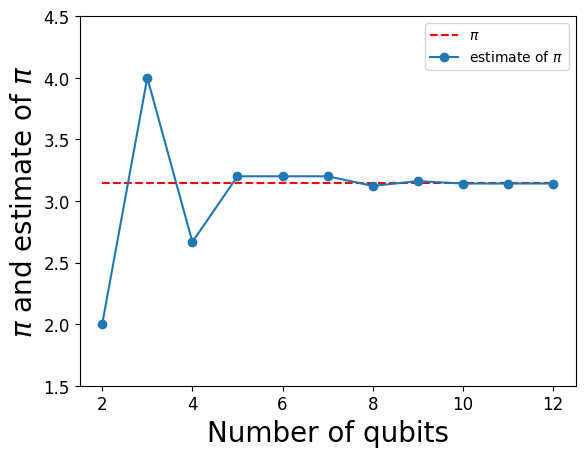

In [ ]:
import numpy as np
import matplotlib.pyplot as plotter
from qiskit import QuantumCircuit, transpile#, assemble
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer
#from qiskit.tools.monitor import job_monitor
#from qiskit_ibm_provider import IBMProvider
from numpy import pi  # Import pi from numpy



# Inverse Quantum Fourier Transform
def qft_dagger(circ, n_qubits):
    for qubit in range(int(n_qubits/2)):
        circ.swap(qubit, n_qubits-qubit-1)
    for j in range(0, n_qubits):
        for m in range(j):
            circ.cp(-np.pi/float(2**(j-m)), m, j)
        circ.h(j)

# Initial state for Quantum Phase Estimation
def qpe_pre(circ, n_qubits):
    circ.h(range(n_qubits))
    circ.x(n_qubits)

    for x in reversed(range(n_qubits)):
        for _ in range(2**(n_qubits-1-x)):
            circ.cp(1, n_qubits-1-x, n_qubits)

# Run a Qiskit job on either hardware or simulators
def run_job(circ, backend, shots=1000, optimization_level=0):
    t_circ = transpile(circ, backend, optimization_level=optimization_level)
    job = backend.run(t_circ, shots=shots)
    #job_monitor(job)
    return job.result().get_counts()


# Load your IBMQ account
#my_provider = IBMProvider()

#simulator_cloud = my_provider.get_backend('ibmq_qasm_simulator')

# Use an available quantum device, for example, 'ibmq_belem'
#device = my_provider.get_backend('ibmq_belem')

# Get Aer simulator
simulator = Aer.get_backend('aer_simulator')

# Function to estimate pi
def get_pi_estimate(n_qubits):
    circ = QuantumCircuit(n_qubits + 1, n_qubits)
    qpe_pre(circ, n_qubits)
    circ.barrier()
    qft_dagger(circ, n_qubits)
    circ.barrier()
    circ.measure(range(n_qubits), range(n_qubits))

    #counts = run_job(circ, backend=simulator, shots=10000, optimization_level=3)
    backend = Aer.get_backend("qasm_simulator")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
    qc_combine = pm.run(circ)
    #display(qc_combine.draw())
    job = backend.run(qc_combine, shots=1024)
    counts = job.result().get_counts()

    max_counts_result = max(counts, key=counts.get)
    max_counts_result = int(max_counts_result, 2)
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

# Estimate pi using different numbers of qubits
nqs = list(range(2,12+1))
pi_estimates = []
for nq in nqs:
    thisnq_pi_estimate = get_pi_estimate(nq)
    pi_estimates.append(thisnq_pi_estimate)
    print(f"{nq} qubits, pi ≈ {thisnq_pi_estimate}")

# Plot the results

plotter.plot(nqs, [pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 12.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\pi$', 'estimate of $\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=12)
plotter.tick_params(axis='y', labelsize=12)
plotter.show()

## Linear algebra inspired
$$
\int_{0}^{\frac{1}{2}} (1 - x^2)^{\frac{1}{2}} \, dx = \int_{0}^{\frac{1}{2}} \left[ 1 - \frac{1}{2} x^2 - \frac{1}{8} x^4 - \frac{1}{16} x^6 - \frac{5}{128} x^8 - \ldots \right] \, dx
$$

$$
\int_{0}^{\frac{1}{2}} (1 - x^2)^{\frac{1}{2}} \, dx = \left[ \frac{1}{2} - \frac{1}{2} \cdot \frac{1}{3}\left(\frac{1}{2}\right)^3 - \frac{1}{8} \cdot \frac{1}{5}\left(\frac{1}{2}\right)^5 - \frac{1}{16} \cdot \frac{1}{7}\left(\frac{1}{2}\right)^7 - \frac{5}{128} \cdot \frac{1}{9}\left(\frac{1}{2}\right)^9 - \ldots \right]
$$


In [2]:
import numpy as np
from helper import (
    generate_integration_matrix,   # expects a full dimension; e.g. generate_integration_matrix(n)
    block_encode_via_svd,
    taylor_series_coefficients,
    is_unitary
)
# --- Set up the integration operator ---
n = 16  # Dimension for our integration matrix.
A_integ = generate_integration_matrix(int(np.log2(n)))
print("Integration Matrix A_integ (n x n):")
print(np.round(A_integ, 6))
q_n = int(np.log2(n))

# Block-encode the integration matrix.
U, alpha = block_encode_via_svd(A_integ)
print("\nIs the block-encoded U unitary?", is_unitary(U))

# --- Prepare the polynomial coefficients ---
coeffs = taylor_series_coefficients(n - 1)
B = np.array(coeffs, dtype=complex)
normB = np.linalg.norm(B)
B_norm = B / normB
print("normB:", normB)
# Extend B_norm to a 2n-dimensional state (first half contains the data, second half zero)
ext_input = np.concatenate([B_norm, np.zeros(n, dtype=complex)])

# --- Compute the integrated coefficients ---
# Apply U to ext_input
v = U @ ext_input
# The top-n entries represent the integrated coefficients (up to normalization)
integrated_coeffs = v[:n] * normB
print("\nRecovered integrated polynomial coefficients:")
print(np.round(integrated_coeffs, 6))

# --- Direct Evaluation (Reference) ---
# Evaluate the integrated polynomial at x = 0.5: F(0.5) = sum_{i=0}^{n-1} c_i (0.5)^i
x = 0.5
eval_vector = np.power(x, np.arange(n))  # [1, 0.5, 0.25, ...]
direct_value = integrated_coeffs.dot(eval_vector)
pi_direct = 12 * (direct_value - (np.sqrt(3)/8))
print("\nApproximated definite integral (direct dot product method):", pi_direct)

# --- Build the diagonal evaluation operator, D = diag((0.5)^i) ---
diag_entries = np.power(x, np.arange(n))
D = np.diag(diag_entries)
U_D, alpha_D = block_encode_via_svd(D)
print("\nBlock-encoded D: U_D shape =", U_D.shape)
print("Scaling factor alpha_D =", alpha_D)
print("\nDiagonal evaluation matrix D = diag([ (0.5)^i ]):")
print(np.round(D, 6))

# --- Define the Projection and Re-embedding Matrices ---
# P selects the top n entries from a 2n-vector. (Dimension: n x 2n)
P = np.hstack([np.eye(n), np.zeros((n, n))])
# R re-embeds an n-vector into the upper half of a 2n-vector. (Dimension: 2n x n)
R = P.T  # Equivalent to placing the n entries in the first n coordinates.

# --- Chain the Operations in One Line ---
# The proper chaining is:
#   result = U_D @ R @ P @ U @ ext_input
# which means:
# 1. Apply U to ext_input (2n-vector).
# 2. Project with P (extract top n entries).
# 3. Re-embed with R (return to 2n space with the bottom half zero).
# 4. Apply U_D, which produces a 2n output.
# 5. Finally, extract the physical state (top n entries) and multiply by normB.
one_line_chain = (U_D @ R @ P @ U @ ext_input)[:n] * normB 
print("\nOne-line chain result vector (physical subspace):")
print(np.round(one_line_chain, 6))

direct_chain = (U @ ext_input)[:n] * normB 
direct_chain = direct_chain.dot(diag_entries)
print("\nOne-line chain result vector (physical subspace):")
print(np.round(direct_chain, 6))

# To produce a scalar (the evaluated polynomial at 0.5), take the dot with a ones vector.
chain_scalar = np.sum(one_line_chain)#one_line_chain.dot(np.ones(n))
print("\nScalar from the one-line chain (via dot with ones):", chain_scalar)

# Final approximated definite integral from the chained approach:
pi_chain = 12 * (chain_scalar - (np.sqrt(3)/8))
print("\nApproximated definite integral (via one-line chain):", pi_chain)


Integration Matrix A_integ (n x n):
[[0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [1.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.5      0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.333333 0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.25     0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.2      0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.166667 0.       0.
  0.       0.       0.       0.       

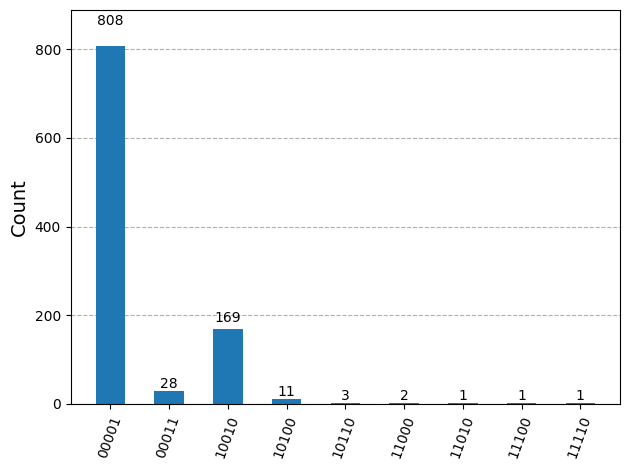

Statevector([ 0.        +0.j,  0.88648963+0.j,  0.        +0.j,
             -0.14774827+0.j,  0.        +0.j, -0.02216224+0.j,
              0.        +0.j, -0.00791509+0.j,  0.        +0.j,
             -0.00384761+0.j,  0.        +0.j, -0.00220363+0.j,
              0.        +0.j, -0.00139846+0.j,  0.        +0.j,
             -0.00095228+0.j,  0.        +0.j,  0.        +0.j,
             -0.41789522+0.j,  0.        +0.j, -0.10857236+0.j,
              0.        +0.j, -0.05483732+0.j,  0.        +0.j,
             -0.03441408+0.j,  0.        +0.j, -0.02413958+0.j,
              0.        +0.j, -0.0181261 +0.j,  0.        +0.j,
             -0.01425248+0.j,  0.        +0.j],
            dims=(2, 2, 2, 2, 2))
Estimated Original Vector: [ 0.        +0.j  1.        +0.j  0.        +0.j -0.16666667+0.j
  0.        +0.j -0.025     +0.j  0.        +0.j -0.00892857+0.j
  0.        +0.j -0.00434028+0.j  0.        +0.j -0.0024858 +0.j
  0.        +0.j -0.00157752+0.j  0.        +0.j -0.0010

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import UnitaryGate

qc = QuantumCircuit(q_n+1)
qc.initialize(ext_input, range(q_n+1))
qc.unitary(U, range(q_n+1), label="D")
#qc.unitary(U_post, range(n+1), label="U_post")
#qc.unitary(W, range(n+1), label="W")
#qc.unitary(U_pre, range(n+1), label="U_pre")

#theta = np.arccos(normB)
#qc.ry(2 * theta, q_n)

from qiskit.quantum_info import Statevector

state = Statevector.from_instruction(qc)

#qc.measure(range(n,n*2),range(n,n*2))
#qc.measure(range(n),range(n))
qc.measure_all()

backend = BasicSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_combine = pm.run(qc)
#display(qc_combine.draw())
job = backend.run(qc_combine, shots=1024)
counts = job.result().get_counts()

display(plot_histogram(counts))
#print(list(counts.keys())[0])

num_qubits = qc.num_qubits
dim = 2**(n+1)
probabilities = np.zeros(dim, dtype=float)

for bitstring, count in counts.items():
    index = int(bitstring, 2)  # Convert bitstring to decimal index
    probabilities[index] = count / 1024  # Normalize by total shots

# Approximate the statevector using square roots of probabilities
estimated_statevector = np.sqrt(probabilities) * np.exp(1j * np.zeros(dim))  # Assuming zero phase

#print("\nEstimated Statevector from Measurements:")
#print(estimated_statevector)

print(state)

# Estimate the normalization factor (assuming it was scaled from an integer set)
norm_factor = 1 / max(np.abs(state))  # Taking max value to reverse-scale

# Approximate original vector
estimated_original_vector = state.data[:n] * normB

print("Estimated Original Vector:", estimated_original_vector)

#estimated_statevector
top_part = estimated_statevector[:n] 

U_phi= top_part* normB
print("\nRecovered A@B via normalized block-encoding:", np.round(U_phi, 6))

# Here we simply compute the dot product.
value = 12*(estimated_original_vector.dot(np.power(0.5, np.arange(n)))-(np.sqrt(3)/8))
print("\nApproximated definite integral (evaluated at x = 1/2):", value)

## Quantum linear system inspired(non-Heisenberg-limited methods)

Classical Part: ( O(n^3) )

Quantum Part (Gate Count): $( O(P \cdot R \cdot n) )$ per shot; then you repeat $( S = O(1/\epsilon^2) )$ times for statistical precision. (On a quantum device, that gives a total processing time of $( O(1/\epsilon^2 \cdot P \cdot R \cdot n) )$, which is linear (or low polynomial) in $( n )$ for fixed $( P, R, \epsilon )$.)

Combined Complexity:If we assume that the classical pre‑processing and the quantum part run on their intended hardware, the overall algorithm has a classical cost of $( O(n^3) )$ and a quantum part that runs in $( O(1/\epsilon^2 \cdot \text{poly}(n)) )$ time.

Thus, the total complexity is:$$[ O\Big([n^3,n^2] + \frac{1}{\epsilon^2} \cdot \text{poly}(n)\Big) ]$$ Here, $(\text{poly}(n))$ comes from the quantum circuit construction (with the sequential repetitions adding a factor that is linear or low-polynomial in $( n )$) and the number $( 1/\epsilon^2 )$ accounts for the shot repetition required to achieve the desired statistical precision.

n: number of qubits

R: state preparation overhead, Qiskit uses Householder reflections, O(n^2), 

P:  block-encoding overhead, m = 2^n, O(m^2), svd O(m^3), 

ε: estimation error, 1/sqrt(number of shots)

Given:  
- $m = 16$ (Taylor series terms),  
- $n = \log_2 m = 4$ (qubits),  
- $\epsilon \approx 0.03$ (target error),  
- $S = \frac{1}{\epsilon^2} \approx 1111$ (shots)

---

**Quantum Complexity**

Asymptotic:
$$
O\left( \frac{1}{\epsilon^2} \cdot P \cdot R \cdot n \right)
= O\left( \frac{1}{\epsilon^2} \cdot m^2 \cdot n^2 \cdot n \right)
= O\left( \frac{m^2 n^3}{\epsilon^2} \right)
$$

Concrete values:
$$
P = m^2 = 256,\quad R = n^2 = 16,\quad n = 4
$$
$$
\Rightarrow \text{Gate count} \approx 1111 \cdot 256 \cdot 16 \cdot 4 \approx 1.8 \times 10^7
$$

➡️ **~18 million gates** total

---

**Classical Complexity**

- SVD of $m \times m$ matrix: $O(m^3) = O(4096)$
- Taylor coefficients + normalization: $O(m)$
- Post-processing (averaging shots): $O(S)$

➡️ **Overall classical: $O(m^3)$, negligible vs quantum cost for small $m$**

In [4]:
import numpy as np
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate  # If needed
from qiskit.quantum_info import Statevector, Operator
from helper import (
    generate_integration_matrix,
    block_encode_via_svd,
    taylor_series_coefficients,
    canonical_phase,
    state_preparation_unitary,
    get_custom_controlled_gate,
    is_unitary
)

# ===============================
# (Assumed earlier definitions)
# ===============================
# - canonical_phase(state)
# - state_preparation_unitary(state)
# - get_custom_controlled_gate(U, label="")
#
# - Transpiler configuration:
transpile_config = {
    "basis_gates": ['u1', 'u2', 'u3', 'cx'],
    "optimization_level": 2,
    "routing_method": 'sabre',  # valid routing method
    "seed_transpiler": 42,
}

# - Build your integration operator, Taylor coefficients, and state-preparation circuits.
n = 8      # number of classical coefficients (and rows/cols of integration matrix)
m = n       # use full n-dimensional polynomial space
A = generate_integration_matrix(int(np.log2(m)))
print("Integration Matrix A (shape {}):\n{}".format(A.shape, np.round(A, 6)))

# Block-encode A
U_A, alpha_A = block_encode_via_svd(A)
print("\nBlock-encoded U_A shape:", U_A.shape)
print("Block-encoding scaling factor alpha_A:", alpha_A)

coeffs = taylor_series_coefficients(m - 1)
B = np.array(coeffs, dtype=complex)
normB = np.linalg.norm(B)
print("\nUnnormalized Taylor coefficients (length {}):".format(len(B)))
print(np.round(B, 6))
print("normB =", normB)

B_norm = np.concatenate([B / normB,
                         np.zeros(U_A.shape[0] - len(B), dtype=complex)])
B_norm = canonical_phase(B_norm)

d_small = np.power(0.5, np.arange(m))
normD = np.linalg.norm(d_small)
d_ext = np.concatenate([d_small,
                        np.zeros(U_A.shape[0] - m, dtype=complex)])
d_ext = canonical_phase(d_ext)
print("\nDiagonal weight vector d (embedded, length {}):".format(len(d_ext)))
print(np.round(d_ext, 6))
print("normD =", normD)

n_q = int(np.log2(U_A.shape[0]))
print("\nNumber of qubits for data register:", n_q)

# Build φ-circuit (with integration operator)
phi_circ = QuantumCircuit(n_q)
phi_prep_unitary = state_preparation_unitary(B_norm)

phi_gate = UnitaryGate(phi_prep_unitary, label="phi_prep")
U_A_gate = UnitaryGate(U_A, label="U_A")
phi_circ.append(phi_gate, range(n_q))
phi_circ.append(U_A_gate, range(n_q))
phi_circ = transpile(phi_circ, **transpile_config)

# Build χ-circuit (diagonal weight state)
chi_circ = QuantumCircuit(n_q)
chi_gate = UnitaryGate(state_preparation_unitary(d_ext), label="chi_prep")
chi_circ.append(chi_gate, range(n_q))
chi_circ = transpile(chi_circ, **transpile_config)

# Extract overall unitaries.
U_phi = Operator(phi_circ).data
U_chi = Operator(chi_circ).data
U_phi_gate = UnitaryGate(U_phi, label="U_phi")
U_chi_gate = UnitaryGate(U_chi, label="U_chi")

# Print global phase difference for calibration.
phi_state = Statevector.from_instruction(U_phi_gate)
psi_state = Statevector.from_instruction(U_chi_gate)
global_phase_diff = np.angle(np.vdot(phi_state.data, psi_state.data))
print("\nGlobal phase difference between φ and χ (radians):", global_phase_diff)

# Create custom controlled gates:
controlled_phi_gate = get_custom_controlled_gate(U_phi, label="U_phi")
controlled_inv_chi_gate = get_custom_controlled_gate(np.linalg.inv(U_chi), label="U_chi_inv")

braket_expected = phi_state.inner(psi_state).real
print("Analytical value:\t", braket_expected)
print("Analytical value pi:\t", 12*(braket_expected* normB * normD- (math.sqrt(3)/8)))

# ==============================================================
# 1) Build a Sequential Repetition (Depth) Block Using Mid-Circuit Reset
# ==============================================================
# In this block, we run the Hadamard test repeatedly in sequence.
# The circuit uses (n_q + 1) qubits (data plus ancilla) and stores 'repeat_count' measurements.
repeat_count = 6  # number of sequential repetitions (depth)
block_qubits = n_q + 1

seq_qr = QuantumRegister(block_qubits, "seq")
seq_cr = ClassicalRegister(repeat_count, "seqc")
seq_circ = QuantumCircuit(seq_qr, seq_cr)

for rep in range(repeat_count):
    # Prepare ancilla in |+>
    seq_circ.h(seq_qr[0])
    # Apply the controlled gates
    seq_circ.append(controlled_phi_gate, [seq_qr[0]] + list(seq_qr[1:]))
    seq_circ.append(controlled_inv_chi_gate, [seq_qr[0]] + list(seq_qr[1:]))
    # Final Hadamard on ancilla
    seq_circ.h(seq_qr[0])
    # Measure the ancilla (store result in corresponding classical bit)
    seq_circ.measure(seq_qr[0], seq_cr[rep])
    # Reset all qubits to |0> so the block can be repeated cleanly
    seq_circ.reset(seq_qr)

# Optionally, decompose the circuit a few times before compilation.
seq_circ_compiled = transpile(seq_circ.decompose(reps=6), **transpile_config)
#print(seq_circ_compiled.draw("text"))  # Uncomment to visualize the block

# ==============================================================
# 2) Build a Parallel (Stacked) Composite Circuit
# ==============================================================
# Here we compose multiple copies of the sequential block in parallel.
n_reps = 1   # number of parallel copies
total_qubits = block_qubits * n_reps
total_classical = repeat_count * n_reps
print("Total qubits for parallel composition:", total_qubits)

big_qr = QuantumRegister(total_qubits, "bigq")
big_cr = ClassicalRegister(total_classical, "bigc")
big_circ = QuantumCircuit(big_qr, big_cr)

# For each parallel copy, compose the compiled sequential block.
for i in range(n_reps):
    qubit_indices = list(range(i * block_qubits, (i + 1) * block_qubits))
    clbit_indices = list(range(i * repeat_count, (i + 1) * repeat_count))
    big_circ.compose(seq_circ_compiled, qubits=qubit_indices, clbits=clbit_indices, inplace=True)

# ==============================================================
# 3) Run the Composite Circuit and Process Results
# ==============================================================
backend = Aer.get_backend("aer_simulator_statevector")
#[AerSimulator('aer_simulator'),
# AerSimulator('aer_simulator_statevector'),
# AerSimulator('aer_simulator_density_matrix'),
# AerSimulator('aer_simulator_stabilizer'),
# AerSimulator('aer_simulator_matrix_product_state'),
# AerSimulator('aer_simulator_extended_stabilizer'),
# AerSimulator('aer_simulator_unitary'),
# AerSimulator('aer_simulator_superop'),
# QasmSimulator('qasm_simulator'),
# StatevectorSimulator('statevector_simulator'),
# UnitarySimulator('unitary_simulator')]
shots = 1024*2
job = backend.run(big_circ, shots=shots, seed_simulator=42)
result = job.result()
counts = result.get_counts()

# In the composite circuit, each shot returns a bitstring of length total_classical.
# Each parallel copy produced 'repeat_count' bits.
# We'll parse the results copy by copy and then average the ancilla |0> probabilities.
# (Make sure to adjust bitstring order if your backend returns MSB-first.)
# Here, we assume the order is such that bits for each copy are ordered together.
all_copy_p0 = []  # list to store p0 for each copy across all shots
for i in range(n_reps):
    all_copy_p0.append([])

# Loop over each shot's outcome.
# The outcome is a bitstring of length total_classical.
for outcome, freq in counts.items():
    # Reverse the string if needed.
    outcome = outcome[::-1]  
    # Split the bitstring into segments corresponding to each parallel copy.
    for i in range(n_reps):
        # Extract the bits for copy i.
        start = i * repeat_count
        end = (i + 1) * repeat_count
        bits = outcome[start:end]
        # For this copy, count the number of |0> outcomes from the sequential block.
        # (Each sequential repetition measured one ancilla result.)
        num_zeros = bits.count("0")
        # Store the probability for this shot (for copy i) weighted by frequency.
        all_copy_p0[i].append((num_zeros / repeat_count, freq))

# Now average probabilities per copy and then overall.
copy_avg_p0 = []
for i in range(n_reps):
    total = 0
    count_sum = 0
    for p0_val, freq in all_copy_p0[i]:
        total += p0_val * freq
        count_sum += freq
    copy_avg_p0.append(total / count_sum if count_sum != 0 else 0)

print("\n--- Combined Parallel & Sequential (Depth) Results ---")
for i, p0_val in enumerate(copy_avg_p0):
    print(f"Copy {i}: Average ancilla |0> probability = {p0_val:.4f}")

# Overall average across all copies:
overall_avg_p0 = np.mean(copy_avg_p0)
print("Overall average ancilla |0> probability:", overall_avg_p0)

# In the Hadamard test, the overlap is given by (2*p0 - 1)
overall_overlap = 2 * overall_avg_p0 - 1
print("Overall computed overlap (Re⟨χ|φ⟩):", overall_overlap)

# Finally, reconstruct the integrated value and approximate π.
F = overall_overlap * normB * normD
pi_approx = 12 * (F - (math.sqrt(3) / 8))
print("Reconstructed integrated value F =", F)
print("Approximation for π =", pi_approx)


Integration Matrix A (shape (8, 8)):
[[0.       0.       0.       0.       0.       0.       0.       0.      ]
 [1.       0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.5      0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.333333 0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.25     0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.2      0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.166667 0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.142857 0.      ]]

Block-encoded U_A shape: (16, 16)
Block-encoding scaling factor alpha_A: 1.0

Unnormalized Taylor coefficients (length 8):
[ 1.    +0.j  0.    +0.j -0.5   +0.j  0.    +0.j -0.125 +0.j  0.    +0.j
 -0.0625+0.j  0.    +0.j]
normB = 1.1267347735824966

Diagonal weight vector d (embedded, length 16):
[1.      +0.j 0.5     +0.j 0.25    +0.j 0.125   +0.j 0.0625  +0

### adding QSP technique

In [4]:
import numpy as np
import math
import time

# --- Qiskit Imports ---
from qiskit import QuantumCircuit, QuantumRegister,transpile
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer.primitives import Sampler
#from qiskit_algorithms.amplitude_estimators import IterativeAmplitudeEstimation, EstimationProblem
from qiskit.providers.basic_provider import BasicSimulator
from helper import (canonical_phase, state_preparation_unitary, qsp_state_preparation_unitary, pad_unitary, block_encode_via_svd, taylor_series_coefficients, integration_matrix_rect)


# -------------------------------
# FLAGS: choose which technique to use
# -------------------------------
use_qsp = True            # If True, use the QSP-based (placeholder) routine.
use_ancilla_free = True   # If True, use the ancilla-free amplitude estimation.

# -------------------------------
# Main Execution: Classical Pre-computation
# -------------------------------
start_time = time.time()

poly_degree = 7
M = poly_degree + 1
print("Using Polynomial Degree:", poly_degree)
print("Coefficient Vector Dimension M =", M)

A_int_rect = integration_matrix_rect(poly_degree)  # Shape (M+1, M)
core_dim = A_int_rect.shape[0]  # M+1
A_int_padded = np.pad(A_int_rect, ((0, 0), (0, core_dim - M)), 'constant')
print("Padded Square Integration Matrix shape:", A_int_padded.shape)

U_A, alpha_A = block_encode_via_svd(A_int_padded)
block_encoding_dim = U_A.shape[0]
print("Block-encoded Unitary U_A shape:", U_A.shape)
print("Block-encoding scaling factor alpha_A: {:.6f}".format(alpha_A))

coeffs = taylor_series_coefficients(poly_degree)
B = np.array(coeffs, dtype=complex)
normB = np.linalg.norm(B)
print("normB =", normB)

d_small = np.power(0.5, np.arange(core_dim))
normD = np.linalg.norm(d_small)
print("normD =", normD)

# Prepare the normalized state vectors (pad to the block encoding dimensions)
B_padded_core = np.pad(B, (0, core_dim - M), 'constant')
B_norm_vec = B_padded_core / normB
psi_B_state = np.pad(B_norm_vec, (0, block_encoding_dim - core_dim), 'constant')

d_norm_vec = d_small / normD
psi_d_state = np.pad(d_norm_vec, (0, block_encoding_dim - core_dim), 'constant')

integrated_coeffs_classical = A_int_rect @ B  # Using the rectangular integration matrix
F_classical = (d_small.T @ integrated_coeffs_classical).real
pi_classical = 12 * (F_classical - (math.sqrt(3) / 8))
print("\nClassical Target Value F_classical =      {:.8f}".format(F_classical))
print("Classical Approx Pi (Taylor Deg {}) = {:.8f}".format(poly_degree, pi_classical))
print("Classical precomputation time: {:.2f}s".format(time.time() - start_time))

# -------------------------------
# Quantum Setup: Create State Preparation Unitaries
# -------------------------------
nq_data = math.ceil(math.log2(block_encoding_dim))
print("Data Qubits needed:", nq_data)

# If using QSP-based state preparation (placeholder), else fallback to Householder
if use_qsp:
    U_psi_B_prep_op = qsp_state_preparation_unitary(psi_B_state, phases=None)
    U_psi_d_prep_op = qsp_state_preparation_unitary(psi_d_state, phases=None)
    prep_method = "QSP-based (placeholder)"
else:
    U_psi_B_prep_op = state_preparation_unitary(psi_B_state)
    U_psi_d_prep_op = state_preparation_unitary(psi_d_state)
    prep_method = "Householder-based"
print("State preparation method:", prep_method)

# --- DEBUG: Verify Active-Space Mappings ---
zero_vec_active = np.zeros(block_encoding_dim, dtype=complex)
zero_vec_active[0] = 1.0
psiB_prepared = U_psi_B_prep_op @ zero_vec_active
psiD_prepared = U_psi_d_prep_op @ zero_vec_active
#print("\n--- DEBUG: Active-Space Verification ---")
#print("Target psi_B_state (active block):\n", psi_B_state)
#print("Prepared psi_B (active block):\n", psiB_prepared)
#print("Target psi_d_state (active block):\n", psi_d_state)
#print("Prepared psi_d (active block):\n", psiD_prepared)

# Pad the unitaries to the full Hilbert space (2^nq_data x 2^nq_data).
U_psi_B_prep_padded = pad_unitary(U_psi_B_prep_op, nq_data)
U_psi_d_prep_padded = pad_unitary(U_psi_d_prep_op, nq_data)
U_A_padded = pad_unitary(U_A, nq_data)

# Create Qiskit UnitaryGate objects.
U_psi_B_gate = UnitaryGate(U_psi_B_prep_padded, label="U_prep_B")
U_psi_d_gate = UnitaryGate(U_psi_d_prep_padded, label="U_prep_d")
U_A_gate = UnitaryGate(U_A_padded, label="U_A")

print("\nQuantum circuit setup time: {:.2f}s".format(time.time() - start_time))

# -------------------------------
# Build and Run the Ancilla-Free Circuit
# -------------------------------
# - Transpiler configuration:
transpile_config = {
    #"basis_gates": ['u1', 'u2', 'u3', 'cx'],
    "optimization_level": 2,
    "routing_method": 'sabre',  # valid routing method
    "seed_transpiler": 42,
}
sampler_instance = Sampler(transpile_options=transpile_config)
q_data = QuantumRegister(nq_data, name="data")
circuit_af = QuantumCircuit(q_data, name="AncillaFree")

# The overall operation is U_psi_B, then U_A, then U_psi_d^†.
circuit_af.append(U_psi_B_gate, q_data)
circuit_af.append(U_A_gate, q_data)
circuit_af.append(U_psi_d_gate.inverse(), q_data)
circuit_af.measure_all()

print("\nRunning ancilla-free circuit with 8192 shots...")
result = sampler_instance.run(circuit_af, shots=8192).result()

# Get the raw counts
counts = result.quasi_dists[0]
print("Raw measurement keys (before processing):", counts.keys())

# Correct the keys: if key is int, convert to bit string then reverse.
counts_corrected = {}
for key, value in counts.items():
    if isinstance(key, int):
        key_str = format(key, '0{}b'.format(nq_data))
    else:
        key_str = key
    key_corrected = key_str[::-1]  # Reverse the bit string.
    counts_corrected[key_corrected] = value

zerostr = "0" * nq_data
prob_zeros = counts_corrected.get(zerostr, 0)
print(prob_zeros)

#from qiskit_aer import AerSimulator
#simulator = AerSimulator()
#transpiled_circuit = transpile(circuit_af, simulator)
#result = simulator.run(transpiled_circuit, shots=8192).result()
#count_zeros = result.get_counts()[zerostr]
#print("Counts from AerSimulator =", counts)

#prob_zeros = count_zeros / 8192
print("\nCorrected Probability of measuring all zeros: {:.6f}".format(prob_zeros))
estimated_overlap = np.sqrt(prob_zeros)
F_approx_af = estimated_overlap * alpha_A * normB * normD
pi_approx_af = 12 * (F_approx_af - (math.sqrt(3) / 8))
print("Estimated overlap amplitude = {:.8f}".format(estimated_overlap))
print("F_approx_af (Reconstructed) = {:.8f}".format(F_approx_af))
print("Ancilla-Free pi approximation = {:.8f}".format(pi_approx_af))
print("F_classical =", F_classical)
print("Classical pi ≈ {:.8f}".format(pi_classical))
print("Exact π =", math.pi)
print("|F_AF - F_classical| =", abs(F_approx_af - F_classical))

# -------------------------------
# Debug: Inspect Full State via Statevector Simulation
# -------------------------------
#print("\n--- DEBUG: Statevector Simulation ---")
## Remove measurements for statevector simulation.
#circuit_debug = circuit_af.remove_final_measurements(inplace=False)
#sv = Statevector(circuit_debug)
#print("Statevector data:\n", sv.data)
#amp0 = sv.data[0]
#F_approx_af = amp0 * alpha_A * normB * normD
#pi_approx_af = 12 * (F_approx_af - (math.sqrt(3) / 8))
#print("statevector pi", pi_approx_af)
#print("Amplitude for |0...0>:", amp0)
#print("Probability for |0...0>:", np.abs(amp0)**2)

end_time = time.time()
print("\nTotal execution time: {:.2f}s".format(end_time - start_time))


Using Polynomial Degree: 7
Coefficient Vector Dimension M = 8
Padded Square Integration Matrix shape: (9, 9)
Block-encoded Unitary U_A shape: (18, 18)
Block-encoding scaling factor alpha_A: 1.000000
normB = 1.1267347735824966
normD = 1.154698335960658

Classical Target Value F_classical =      0.47831566
Classical Approx Pi (Taylor Deg 7) = 3.14171174
Classical precomputation time: 0.01s
Data Qubits needed: 5
State preparation method: QSP-based (placeholder)

Quantum circuit setup time: 0.02s

Running ancilla-free circuit with 8192 shots...
Raw measurement keys (before processing): dict_keys([3, 2, 11, 13, 4, 0, 1, 7, 5, 15, 8, 6])
0.136474609375

Corrected Probability of measuring all zeros: 0.136475
Estimated overlap amplitude = 0.36942470
F_approx_af (Reconstructed) = 0.48063586
Ancilla-Free pi approximation = 3.16955408
F_classical = 0.478315662202381
Classical pi ≈ 3.14171174
Exact π = 3.141592653589793
|F_AF - F_classical| = 0.0023201951134678156

Total execution time: 0.81s


## Big-O Complexity Analysis for the Quantum Integration Algorithm

Let **d** be the polynomial degree (i.e., `poly_degree`)  
Let **ε** be the target error for amplitude estimation  

classical Monte Carlo integration require **O(1/ε²)**, here we got quadratic speed up

## 1. Classical Preprocessing

- **Integration Matrix Construction:**  
  The integration matrix is of size roughly (d+1)×(d+1), so its construction takes **O(d²)**.

- **SVD Computation:**  
  The SVD is performed on a matrix of size O(d)×O(d), which costs **O(d³)** in the worst case.

- **Taylor-series Coefficients Calculation:**  
  Calculating the coefficients scales linearly as **O(d)**.

---

### 2. Quantum Circuit Construction and Execution

- **State Preparation via QSP/QSVT:**  
  - **Circuit Depth:**  
    The optimized QSP-based state preparation yields a circuit whose depth scales as **O(d)** (since the number of layers is roughly proportional to d).  
  - **Qubit Count:**  
    The active space has dimension O(d), which is embedded in a register of **O(log d)** qubits.

- **Block Encoding of the Integration Operator:**  
  The block encoding routine is implemented with **O(d)** gates (in an ideal scenario).

- **Adaptive Iterative Amplitude Estimation (IAE):**  
  - IAE provides a quadratic speedup in sampling compared to classical Monte Carlo methods.  
  - The number of oracle calls required scales as **O(1/ε)** for fixed target error.

---

### 3. Combined Overall Complexity

- **Classical Preprocessing:** **O(d³)**  
- **Quantum Execution (per circuit run):**  
  - **Gate Depth:** O(d)  
  - **Qubit Count:** O(log d)  
  - **Sampling Calls:** O(1/ε)  

**Summary:**  
The algorithm achieves:
- A classical runtime of **O(d³)**,
- A quantum circuit with **linear gate depth O(d)** on **O(log d)** qubits,
- And a quadratic speedup in sampling (via amplitude estimation) leading to **O(1/ε)** oracle calls.

This framework is asymptotically efficient, especially when the integrand is well-approximated by a polynomial of degree **d**.

compare to https://www.nature.com/articles/s41598-024-61010-9#Sec8  

- **Classical Preprocessing:** **O(d³)**, but need to done multiple time compare to mine
- **Quantum Execution (Per Query):** **O(d)** gate depth on **O(log d)** qubits, but require extra ancilla qubits and deeper circuits
- **Sampling / Oracle Calls:** **O(1/ε)** iterations (due to adaptive amplitude estimation), overall **O(d/ε)** 


In [ ]:
import numpy as np
import math
import time

# --- Qiskit Imports ---
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer.primitives import Sampler
from qiskit_algorithms.amplitude_estimators import IterativeAmplitudeEstimation, EstimationProblem
from qiskit.providers.basic_provider import BasicSimulator
from helper import (canonical_phase, state_preparation_unitary, qsp_state_preparation_unitary, pad_unitary, block_encode_via_svd, taylor_series_coefficients, integration_matrix_rect)

# -------------------------------
# FLAGS: choose which technique to use
# -------------------------------
use_qsp = True            # If True, use the (placeholder) QSP-based routine.
epsilon_target = 0.01  # desired precision
alpha = 0.05         # confidence level
# (In a production code, you would replace this with a routine that computes the optimal QSP/QSVT phase factors.)

# -------------------------------
# Main Execution: Classical Pre-computation
# -------------------------------
start_time = time.time()

# Using a higher polynomial degree (e.g., 15) for improved precision.
poly_degree = 15
M = poly_degree + 1
print("Using Polynomial Degree:", poly_degree)
print("Coefficient Vector Dimension M =", M)

A_int_rect = integration_matrix_rect(poly_degree)  # Shape (M+1, M)
core_dim = A_int_rect.shape[0]  # M+1
A_int_padded = np.pad(A_int_rect, ((0, 0), (0, core_dim - M)), 'constant')
print("Padded Square Integration Matrix shape:", A_int_padded.shape)

U_A, alpha_A = block_encode_via_svd(A_int_padded)
block_encoding_dim = U_A.shape[0]
print("Block-encoded Unitary U_A shape:", U_A.shape)
print("Block-encoding scaling factor alpha_A: {:.6f}".format(alpha_A))

coeffs = taylor_series_coefficients(poly_degree)
B = np.array(coeffs, dtype=complex)
normB = np.linalg.norm(B)
print("normB =", normB)

d_small = np.power(0.5, np.arange(core_dim))
normD = np.linalg.norm(d_small)
print("normD =", normD)

# Prepare normalized state vectors (pad to block encoding dimension)
B_padded_core = np.pad(B, (0, core_dim - M), 'constant')
B_norm_vec = B_padded_core / normB
psi_B_state = np.pad(B_norm_vec, (0, block_encoding_dim - core_dim), 'constant')

d_norm_vec = d_small / normD
psi_d_state = np.pad(d_norm_vec, (0, block_encoding_dim - core_dim), 'constant')

# Classical integration result (for comparison)
integrated_coeffs_classical = A_int_rect @ B  # rectangular integration
F_classical = (d_small.T @ integrated_coeffs_classical).real
pi_classical = 12 * (F_classical - (math.sqrt(3) / 8))
print("\nClassical Target Value F_classical =      {:.8f}".format(F_classical))
print("Classical Approx Pi (Taylor Deg {}) = {:.8f}".format(poly_degree, pi_classical))
print("Classical precomputation time: {:.2f}s".format(time.time() - start_time))

# -------------------------------
# Quantum Setup: Create State Preparation Unitaries (with optimized QSP placeholder)
# -------------------------------
nq_data = math.ceil(math.log2(block_encoding_dim))
print("\nData Qubits needed:", nq_data)

if use_qsp:
    U_psi_B_prep_op = qsp_state_preparation_unitary(psi_B_state, phases=None)
    U_psi_d_prep_op = qsp_state_preparation_unitary(psi_d_state, phases=None)
    prep_method = "QSP-based (placeholder)"
else:
    U_psi_B_prep_op = state_preparation_unitary(psi_B_state)
    U_psi_d_prep_op = state_preparation_unitary(psi_d_state)
    prep_method = "Householder-based"
print("State preparation method:", prep_method)

# --- Debug: Active-Space Verification ---
zero_vec_active = np.zeros(block_encoding_dim, dtype=complex)
zero_vec_active[0] = 1.0
psiB_prepared = U_psi_B_prep_op @ zero_vec_active
psiD_prepared = U_psi_d_prep_op @ zero_vec_active
print("\n--- DEBUG: Active-Space Verification ---")
print("Target psi_B_state (active block):\n", psi_B_state)
print("Prepared psi_B (active block):\n", psiB_prepared)
print("Target psi_d_state (active block):\n", psi_d_state)
print("Prepared psi_d (active block):\n", psiD_prepared)

# Pad these unitaries to full Hilbert space (2^nq_data x 2^nq_data)
U_psi_B_prep_padded = pad_unitary(U_psi_B_prep_op, nq_data)
U_psi_d_prep_padded = pad_unitary(U_psi_d_prep_op, nq_data)
U_A_padded = pad_unitary(U_A, nq_data)

# Create Qiskit UnitaryGate objects.
U_psi_B_gate = UnitaryGate(U_psi_B_prep_padded, label="U_prep_B")
U_psi_d_gate = UnitaryGate(U_psi_d_prep_padded, label="U_prep_d")
U_A_gate = UnitaryGate(U_A_padded, label="U_A")

print("\nQuantum circuit setup time: {:.2f}s".format(time.time() - start_time))

# -------------------------------
# Build the Hadamard-Test Circuit for IAE
# -------------------------------
# The goal is to encode the overlap ⟨psi_d|U_A|psi_B⟩ (which, after scaling, yields F and ultimately π)
# We construct the following circuit:
#   1. Prepare ancilla in |+>
#   2. Apply a controlled version of U_phi = U_A * U_psi_B on the data register controlled by ancilla.
#   3. Apply a controlled version of U_psi_d^† (i.e. the inverse of U_psi_d) with a phase shift.
#   4. Finally, a Hadamard on ancilla converts phase information into amplitude.
anc = QuantumRegister(1, name="anc")
data = QuantumRegister(nq_data, name="data")
circuit_iae = QuantumCircuit(anc, data, name="HadamardTest")

# 1. H on ancilla.
circuit_iae.h(anc[0])

# 2. Controlled U_phi = controlled(U_A * U_psi_B)
# Build U_phi: first prepare state |psi_B> on data and then apply U_A.
temp_qc_phi = QuantumCircuit(nq_data, name="phi_temp")
temp_qc_phi.append(U_psi_B_gate, range(nq_data))
temp_qc_phi.append(U_A_gate, range(nq_data))
U_phi_op = Operator(temp_qc_phi)
U_phi_gate = UnitaryGate(U_phi_op, label="U_phi")

# Append controlled U_phi
circuit_iae.append(U_phi_gate.control(1), [anc[0]] + list(range(1, nq_data + 1)))

# 3. Controlled U_psi_d^†:
# U_psi_d^† maps |psi_d> back to |0>.
# Append its inverse controlled.
circuit_iae.append(U_psi_d_gate.inverse().control(1), [anc[0]] + list(range(1, nq_data + 1)))

# 4. Final H on ancilla.
circuit_iae.h(anc[0])

# (Optional) Draw the circuit.
#print(circuit_iae.draw(output='text', fold=120))

# -------------------------------
# Define the Estimation Problem for IAE.
# -------------------------------
# When you measure the ancilla, its 1 probability is related to the real part of the overlap via:
#     P(1) = 0.5*(1 - Re(⟨psi_d| U_A |psi_B⟩)).
# Hence, the postprocessing function is:
postproc = lambda p: 1 - 2 * p

problem = EstimationProblem(
    state_preparation=circuit_iae,
    objective_qubits=[0],     # ancilla qubit index.
    post_processing=postproc,
)

# -------------------------------
# Apply Iterative Amplitude Estimation (IAE)
# -------------------------------
iae = IterativeAmplitudeEstimation(
    epsilon_target=epsilon_target,
    alpha=alpha,
    sampler=Sampler()   # Use the default Sampler (which works on AerSimulator by default)
)

print("\nRunning Iterative Amplitude Estimation (IAE)...")
iae_result = iae.estimate(problem)

# The estimation result is for the amplitude p (from which Re(O) = 1 - 2p)
prob_1_estimate = iae_result.estimation
re_O_estimate = postproc(prob_1_estimate)
print("Estimated P(1) on ancilla:", prob_1_estimate)
print("Estimated Re(⟨psi_d| U_A |psi_B⟩) = 1 - 2P(1):", re_O_estimate)

# Optionally, obtain the confidence interval.
ci = iae_result.confidence_interval
print("Confidence interval for the raw amplitude estimate:",
      [ci[0] ** 2, ci[1] ** 2])

# -------------------------------
# Reconstruct the final F and π values.
# -------------------------------
# Typically, F = Re(O) * alpha_A * normB * normD, and then π is given by mapping F:
F_approx = re_O_estimate * alpha_A * normB * normD
pi_approx = 12 * (F_approx - (math.sqrt(3) / 8))
print("\n--- IAE Results ---")
print("Classical F =", F_classical)
print("Reconstructed F (from IAE) =", F_approx)
print("|F_IAE - F_classical| =", abs(F_approx - F_classical))
print("Classical π ≈ {:.8f}".format(pi_classical))
print("Reconstructed π (from IAE) =", pi_approx)
print("Exact π =", math.pi)

end_time = time.time()
print("\nTotal execution time: {:.2f}s".format(end_time - start_time))


ImportError: cannot import name 'BaseSampler' from 'qiskit.primitives' (c:\Users\junli\anaconda3\envs\TMBB\Lib\site-packages\qiskit\primitives\__init__.py)

In [ ]:
#todo: QSP phase optimization, adaptive amplitude estimation, or error-mitigation strategies?
# strink the vector down half by delete 0 in the vector/matrix

In [187]:
import numpy as np

def n_block_apply_via_eigen(M,n=1):
    # Define the Fibonacci transformation matrix
    #M = np.array([[0, 1],
    #              [1, 1]])
    
    # Compute eigenvalues and eigenvectors of M
    eigenvalues, eigenvectors = np.linalg.eig(M)
    
    # The eigenvectors returned by np.linalg.eig are in the columns of 'eigenvectors'
    # The paper uses the convention:
    #   v_phi = [1, phi]^T and v_psi = [1, psi]^T,
    # where phi = (1+√5)/2 and psi = (1-√5)/2.
    
    m = np.diag(eigenvalues)
    # We force each eigenvector's first component to 1 by dividing the whole column by its 0-th entry.
    B = np.copy(eigenvectors)  # making a copy for safety
    for i in range(B.shape[1]):
        # Check that the first element is not zero (it shouldn't be for M)
        B[:, i] = B[:, i] / B[0, i]
    
    # Now the matrix B should look like:
    # [[1, 1],
    #  [phi, psi]]
    return B@m**n@np.linalg.inv(B)

block_encode_via_svd(n_block_apply_via_eigen(fib_matrix,n=2))

(array([[ 0.38196601,  0.38196601,  0.71586394, -0.44242825],
        [ 0.38196601,  0.76393202, -0.44242825,  0.27343569],
        [ 0.71586394, -0.44242825, -0.38196601, -0.38196601],
        [-0.44242825,  0.27343569, -0.38196601, -0.76393202]]),
 np.float64(2.6180339887498953))

In [41]:
## calculate fibbonaci

import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from helper import lower_toeplitz_matrix, pad_to_N, qsp_state_preparation_unitary ,block_encode_via_svd
# Inputs
fib_matrix = np.array([[0,1], [1,1]], dtype=float)# is this turing instruction? B@m**1@B_inv
f_U,alpha = block_encode_via_svd(fib_matrix)
v = np.array([0,1])
n_q = 1
N = 2**n_q  # 8

for i in range(6):
    v_pad = pad_to_N(v, N)
    ## Prepare extended normalized state
    norm_v = np.linalg.norm(v_pad)
    v_norm = v_pad / norm_v
    ext_norm = np.concatenate([v_norm, np.zeros(f_U.shape[0] - len(v_norm))])

    # Quantum circuit
    qc = QuantumCircuit(n_q + 1)
    U_prep = qsp_state_preparation_unitary(ext_norm)
    qc.append(UnitaryGate(U_prep, label="U_prep"), range(n_q + 1))
    qc.append(UnitaryGate(f_U, label="T_fU"), range(n_q + 1))

    # Simulate
    sv = Statevector.from_instruction(qc)
    #conv_result = sv.data[:m] * norm_g * alpha

    print("Recovered convolution result (optimized):", np.round(sv*alpha*norm_v, 6))
    v = sv.data[:2]*alpha*norm_v
    


Recovered convolution result (optimized): [ 1.      +0.j  1.      +0.j -0.66874 +0.j  0.413304+0.j]
Recovered convolution result (optimized): [ 1.      +0.j  2.      +0.j  0.413304+0.j -0.255436+0.j]
Recovered convolution result (optimized): [ 2.      +0.j  3.      +0.j -0.255436+0.j  0.157868+0.j]
Recovered convolution result (optimized): [ 3.      +0.j  5.      +0.j  0.157868+0.j -0.097568+0.j]
Recovered convolution result (optimized): [ 5.      +0.j  8.      +0.j -0.097568+0.j  0.0603  +0.j]
Recovered convolution result (optimized): [ 8.      +0.j 13.      +0.j  0.0603  +0.j -0.037268+0.j]


In [95]:
def sieve_of_eratosthenes(n):
    """Generates prime numbers up to n using Sieve of Eratosthenes."""
    primes = [True] * (n + 1)
    primes[0] = primes[1] = False
    for p in range(2, int(n**0.5) + 1):
        if primes[p]:
            for i in range(p * p, n + 1, p):
                primes[i] = False
    return [i for i in range(2, n + 1) if primes[i]]

def create_prime_matrix(rows, cols):
    """Creates a matrix filled with prime numbers."""
    num_primes = rows * cols
    prime_numbers = sieve_of_eratosthenes(num_primes)
    matrix = []
    for _ in range(rows):
        row = []
        for i in range(cols):
            if i < len(prime_numbers):
                row.append(prime_numbers[i])
            else:
                row.append(None)  # Handle cases where not enough primes are generated
        matrix.append(row)
    return matrix

# Example Usage
rows = 2
cols = 4
prime_matrix = create_prime_matrix(rows, cols)
print(prime_matrix)
for row in prime_matrix:
    print(row)

[[2, 3, 5, 7], [2, 3, 5, 7]]
[2, 3, 5, 7]
[2, 3, 5, 7]


In [98]:
from helper import is_unitary
is_unitary(np.array([[0,1,0],[0,0,1],[1,0,0]],dtype=np.float64))

True